In [ ]:
# G. Hayes 2023
# This file contains the batch analysis code used in the study presented in the paper:
# S. Sparks, G. Hayes, J. Pinto, and D. Bulte, “Characterising cerebrovascular reactivity and the pupillary light response–a comparative study,” Front. Physiol., vol. 15, Aug. 2024, doi: 10.3389/fphys.2024.1384113.

# Updated this script for your purposes, notably:
# - the data folder name
# - the data file name
# - the output file name
# - alter parameters that may differ for your data

In [30]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import find_peaks
import pwl_cvr_functions as cvr_func
import copy
import csv

In [ ]:
# Define where the PWL txt files is located 
data_dir = 'path/to/data/directory'

In [32]:
# GLOBAL VARIABLES #

# Set TCD calibration factor (determined from DWL Dopler BoxX manual) and cut-off threshold (erroneous TCD values are set to NaN if below threshold)
TCD_calibration_factor = 202.07 # TCD calibration factor in cm/s/V
TCD_threshold = 0.07*TCD_calibration_factor # TCD threshold in cm/s

window_length_baseline1 = 120 # window length for baseline correction in s
window_length_5co2 = 120 # window length for 5% CO2 challenge in s
window_length_baseline2 = 70 # window length for baseline correction in s

csv_consolidated = 'pwl_outputs/cvr_consolidated.csv'
log_consolidated = 'pwl_outputs/logs_consolidated.csv'
csv_ses01 = 'cvr_ses-01.csv'
log_ses01 = 'logs_ses-01.csv'
csv_ses02 = 'cvr_ses-02.csv'
log_ses02 = 'logs_ses-02.csv'

plotting = True # plotting flag
save_fig = True # save figure flag
save_csv = True # save csv of results flag
save_log = True # save summary of results flag

# Set all fonts to Sans
mpl.rcParams['font.family'] = 'sans-serif'


sub-001_ses-01_dat-20230227_task-tcd5co2_pwl.txt
---------------------
Baseline 1:  183.75 s || 5% CO2:  121.45 s || Baseline 2:  118.15 s
-------After Cropping-------
Baseline 1:  119.995 s || 5% CO2:  119.995 s || Baseline 2:  69.995 s
Average breathing rate during baseline: 8.000000000007276 breaths/min
Average breathing rate during 5% CO2: 7.0000000000063665 breaths/min


/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(dataframe.iloc[2][0]) - float(dataframe.iloc[1][0]))
/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(dataframe.iloc[2][0]) - float(dataframe.iloc[1][0]))
/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:345: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer ke

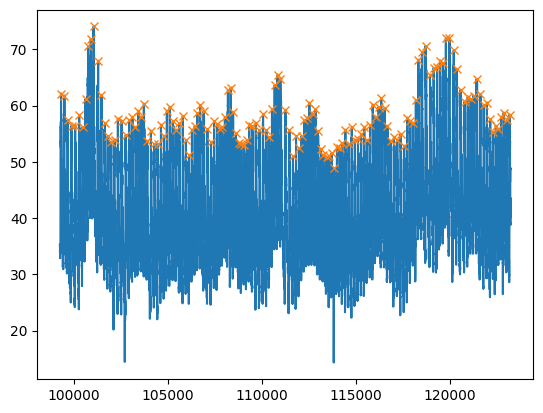

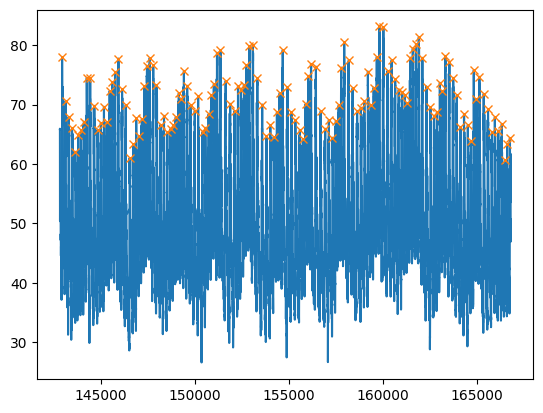

Average heart rate during baseline: 72.50302095927258 beats/min
Average heart rate during 5% CO2: 67.0027917830519 beats/min
Sample rate: 200.0000000001819 Hz || Search window: 4.499999999995907 seconds
---------------------
--- BASELINE DATA ---
end tidal CO2 mean: 36.50379049562235 mmHg
end tidal O2 mean: 114.6897194832741 mmHg
Stimulus index: 0.31828302187927066
MCAvmean mean_base: 41.03358657639564 cm s-1
--- 5% CO2 DATA ---
end tidal CO2 mean: 42.642092975004715 mmHg
end tidal O2 mean: 126.16039991790153 mmHg
Stimulus index: 0.3379990314136125
MCAvmean mean_5CO2: 50.643537260865074 cm s-1
---------------------


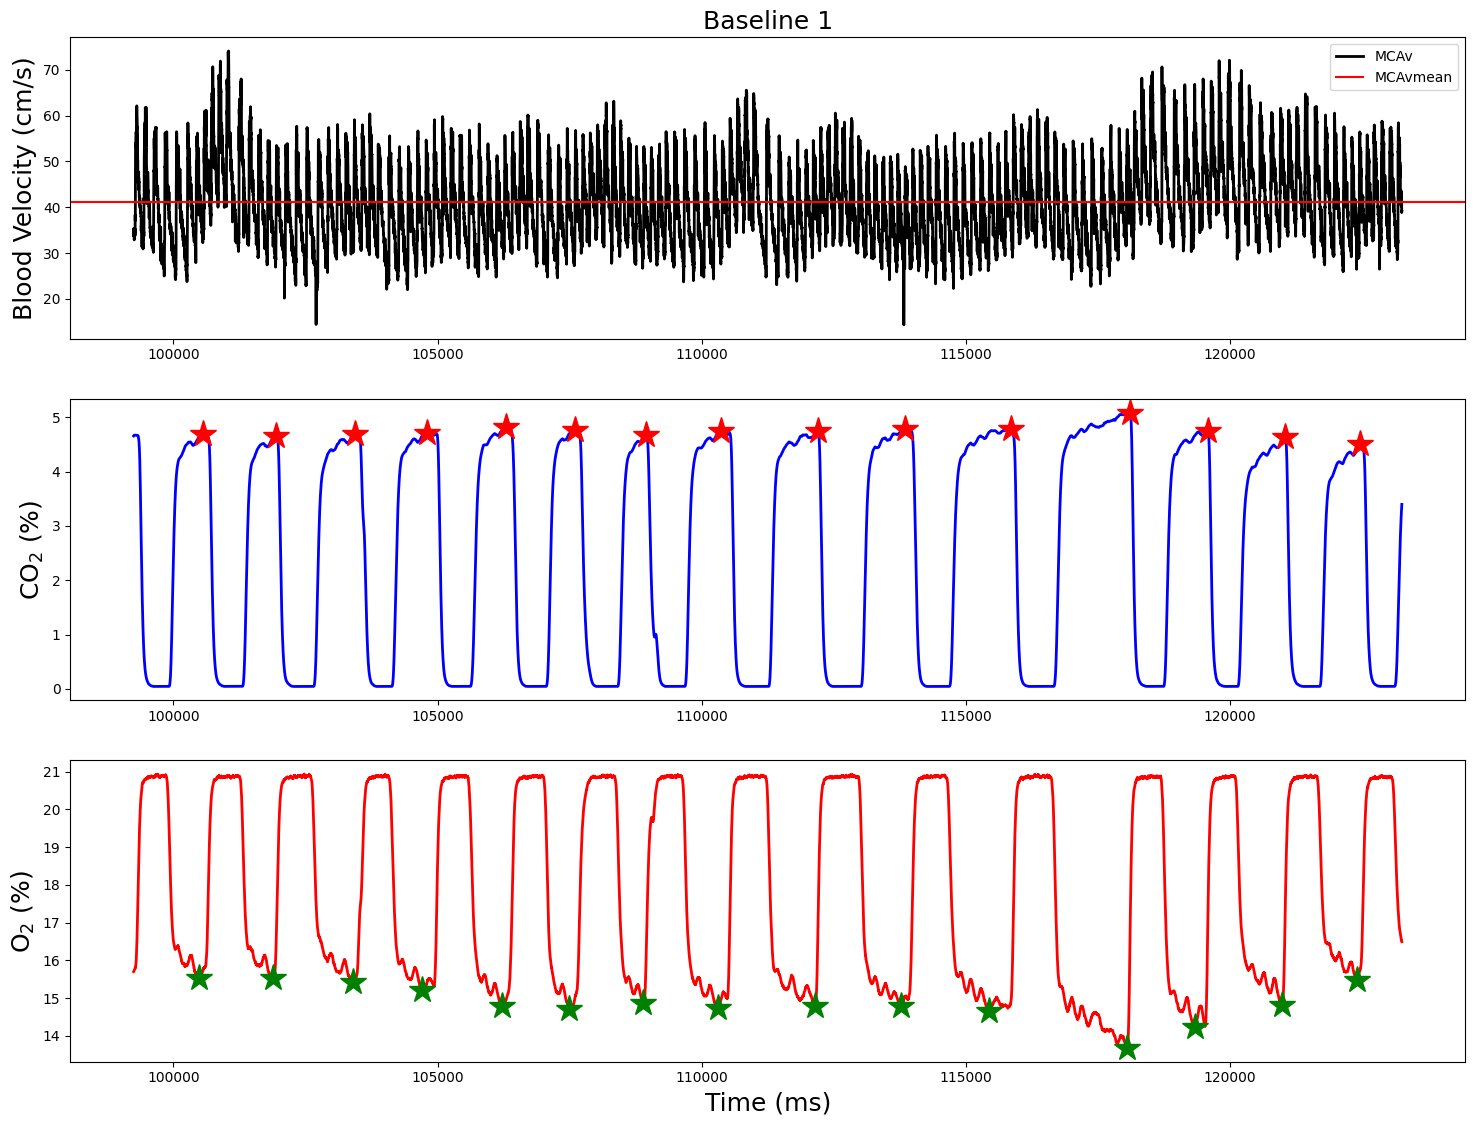

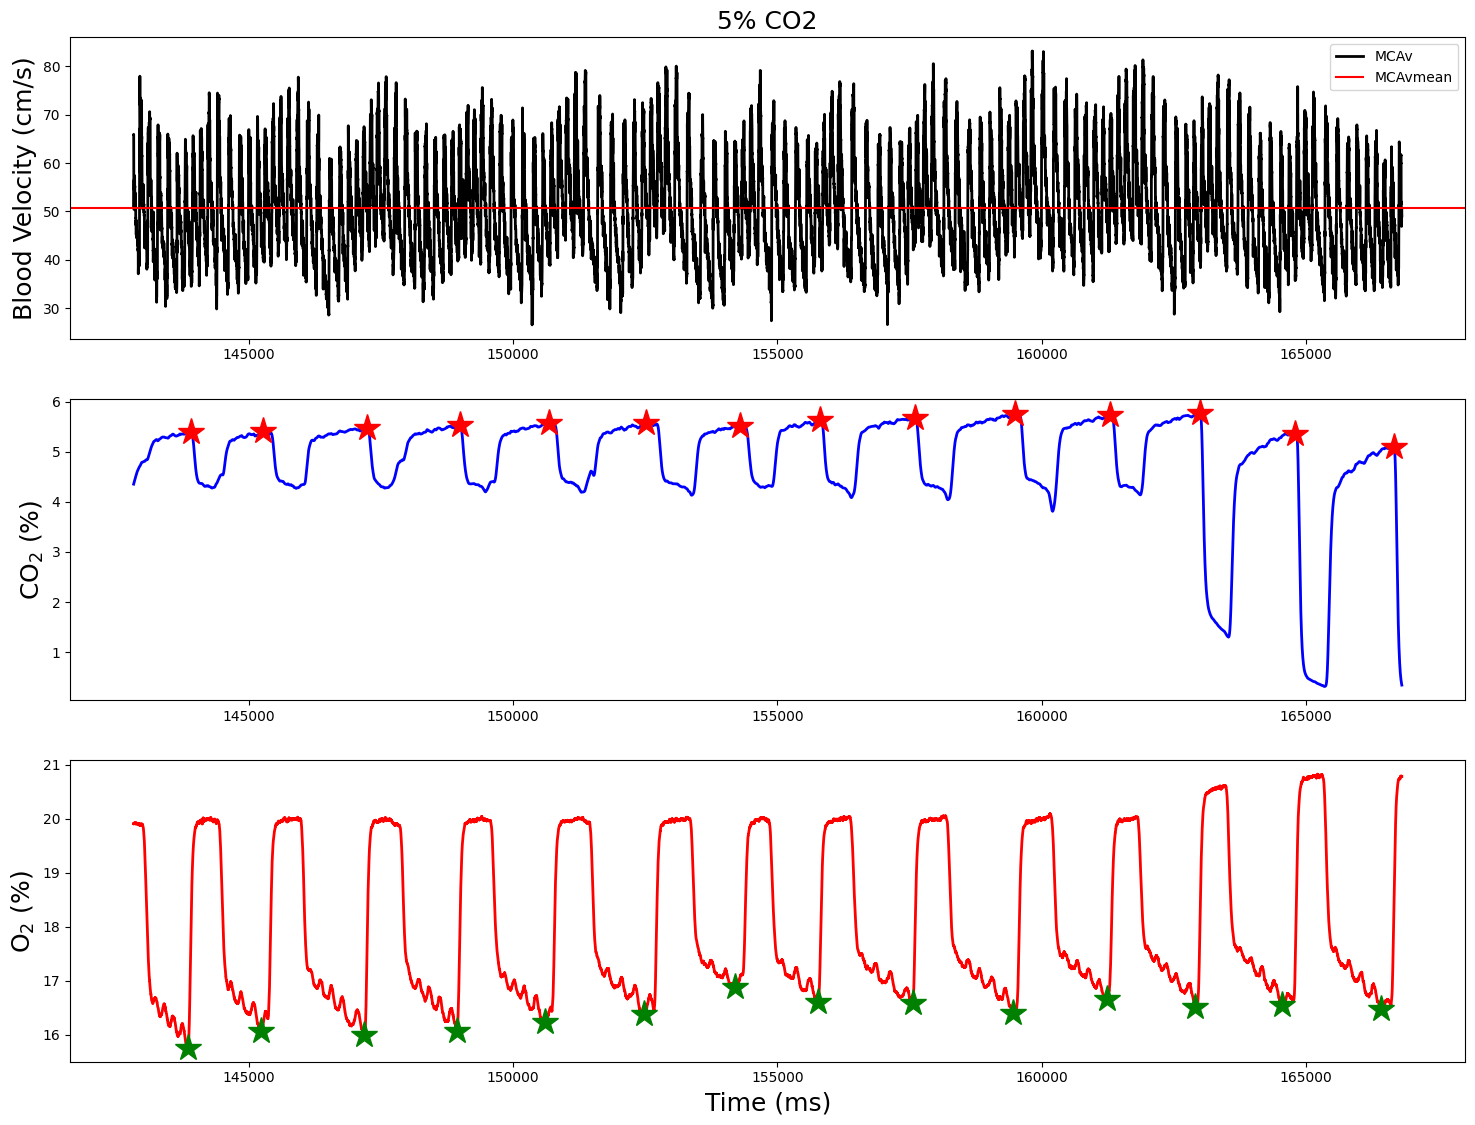

CVR: 3.815341311299984 %/mmHg
CVR_SI: 154.143842754562 %/mmHg
Percent CVR: 23.419719030842668 %/mmHg


In [ ]:
# SUBJECT 1 #
filename = 'sub-001_ses-01_dat-YYYYMMDD_task-tcd5co2_pwl.txt'
filepath = data_dir + filename
CO2prominence_base = 1
O2prominence_base = 1
CO2prominence_5co2 = 0.5
O2prominence_5co2 = 1
comment_start_baseline1 = 0
comment_end_baseline1 = 1
comment_start_5co2 = 2
comment_end_5co2 = 3
comment_start_baseline2 = 4
comment_end_baseline2 = 5

P_oxford = 1027.4 # hPa aka mbar (Oxford)
P_conversion_perc2mmHg = P_oxford*(0.75006157584566)/100 # conversion factor from % gas concentration to mmHg

print(filename)
percent_CVR, CVR, CVR_SI = cvr_func.get_cvr(filepath, plotting, save_fig, save_csv, csv_ses01, save_log, log_ses01, comment_start_baseline1, comment_end_baseline1, comment_start_5co2, comment_end_5co2, comment_start_baseline2, comment_end_baseline2, TCD_calibration_factor, TCD_threshold, CO2prominence_base, O2prominence_base, CO2prominence_5co2, O2prominence_5co2, P_conversion_perc2mmHg, window_length_baseline1, window_length_5co2, window_length_baseline2)
print('CVR: ' + str(CVR) + ' %/mmHg')
print('CVR_SI: ' + str(CVR_SI) + ' %/mmHg')
print('Percent CVR: ' + str(percent_CVR) + ' %/mmHg')


sub-020_ses-01_dat-20230531_task-tcd5co2_pwl.txt
---------------------
Baseline 1:  183.15 s || 5% CO2:  183.4 s || Baseline 2:  122.75 s
-------After Cropping-------
Baseline 1:  119.99499999999999 s || 5% CO2:  119.99499999999995 s || Baseline 2:  69.995 s
Average breathing rate during baseline: 15.500000000014097 breaths/min
Average breathing rate during 5% CO2: 12.500000000011369 breaths/min


/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(dataframe.iloc[2][0]) - float(dataframe.iloc[1][0]))
/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_rate = 1/(float(dataframe.iloc[2][0]) - float(dataframe.iloc[1][0]))
/Users/ghayes/Documents/GitHub/End-Tidal-Extraction/pwl-analysis/pwl_cvr_functions.py:345: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer ke

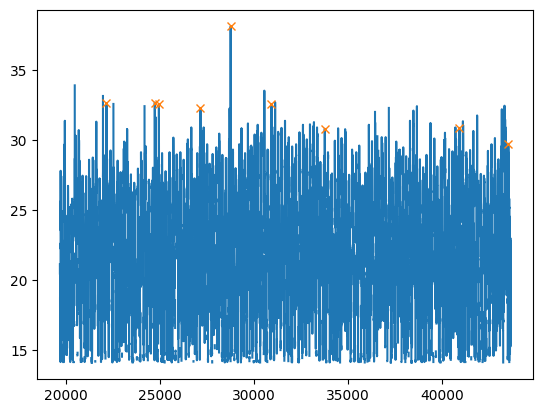

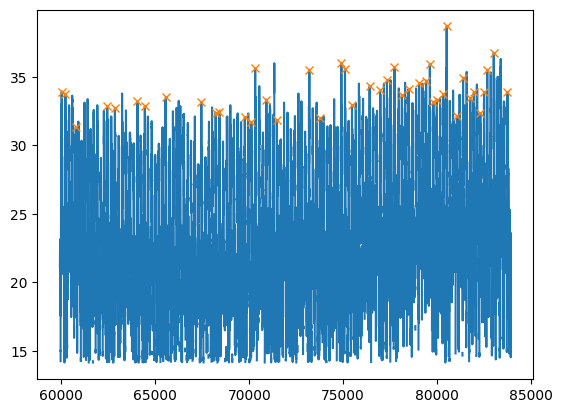

Average heart rate during baseline: 4.500187507816918 beats/min
Average heart rate during 5% CO2: 21.500895870680832 beats/min
Sample rate: 200.0000000001819 Hz || Search window: 2.322580645159178 seconds
---------------------
--- BASELINE DATA ---
end tidal CO2 mean: 32.181534302422534 mmHg
end tidal O2 mean: 117.11699385812722 mmHg
Stimulus index: 0.27478108208110674
MCAvmean mean_base: 22.566006551139978 cm s-1
--- 5% CO2 DATA ---
end tidal CO2 mean: 42.901086634211794 mmHg
end tidal O2 mean: 122.98868418069787 mmHg
Stimulus index: 0.34882141328693705
MCAvmean mean_5CO2: 23.573855878796685 cm s-1
---------------------


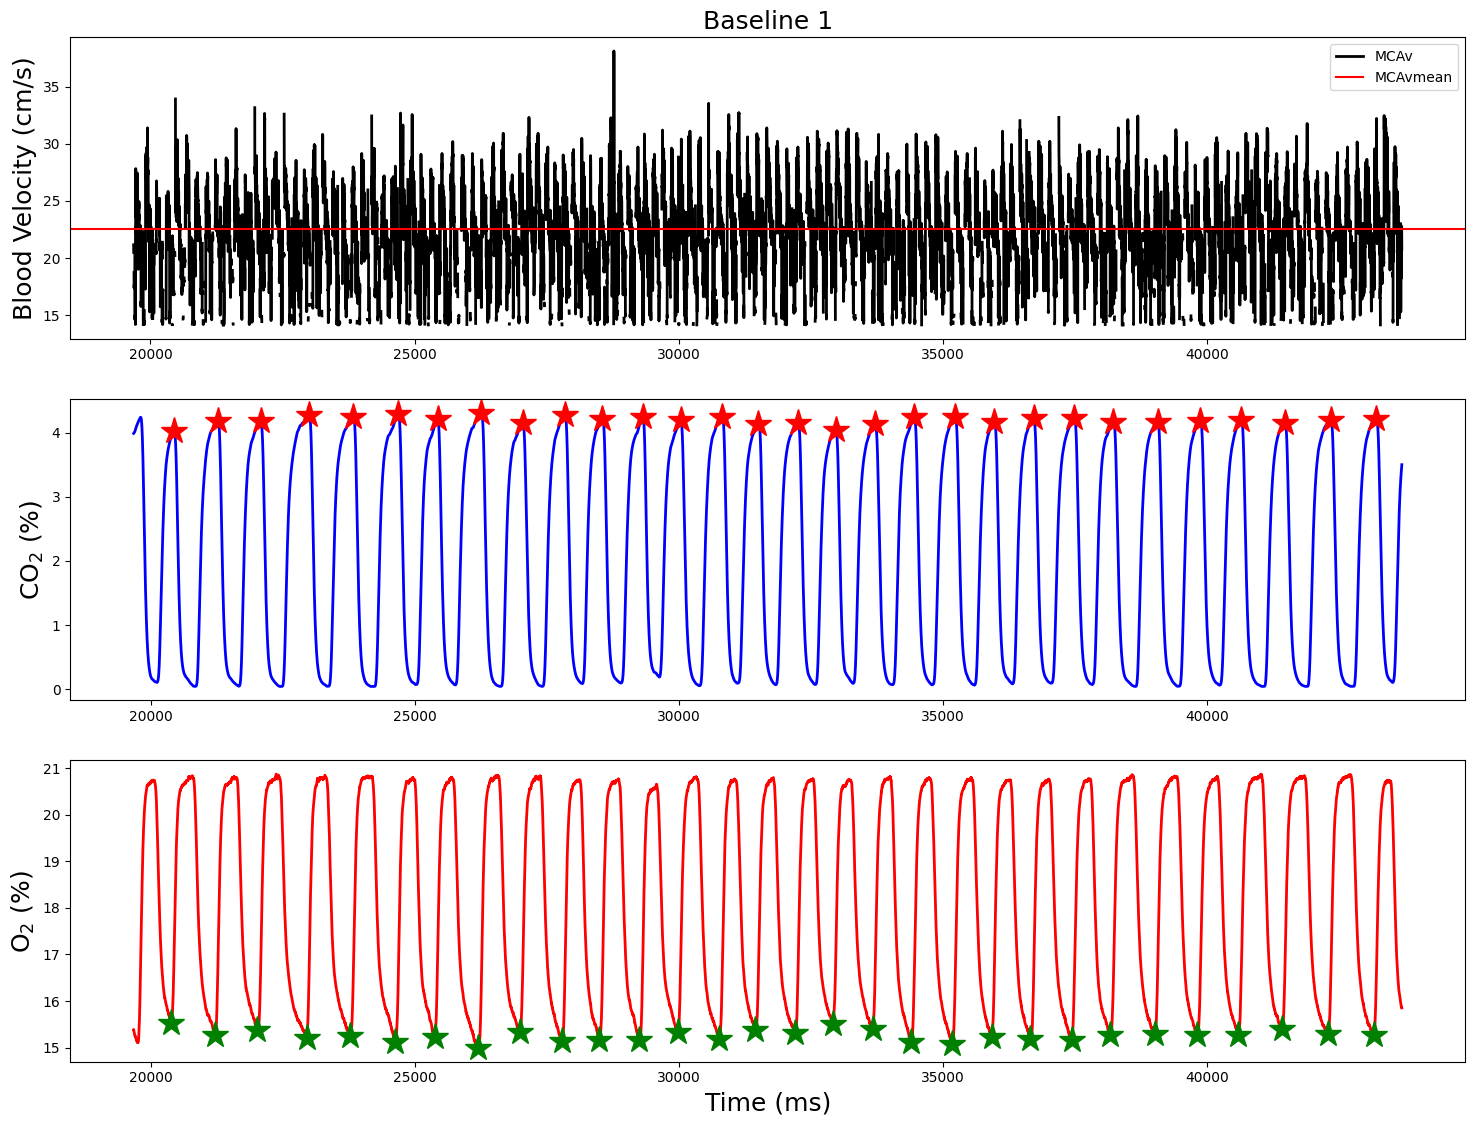

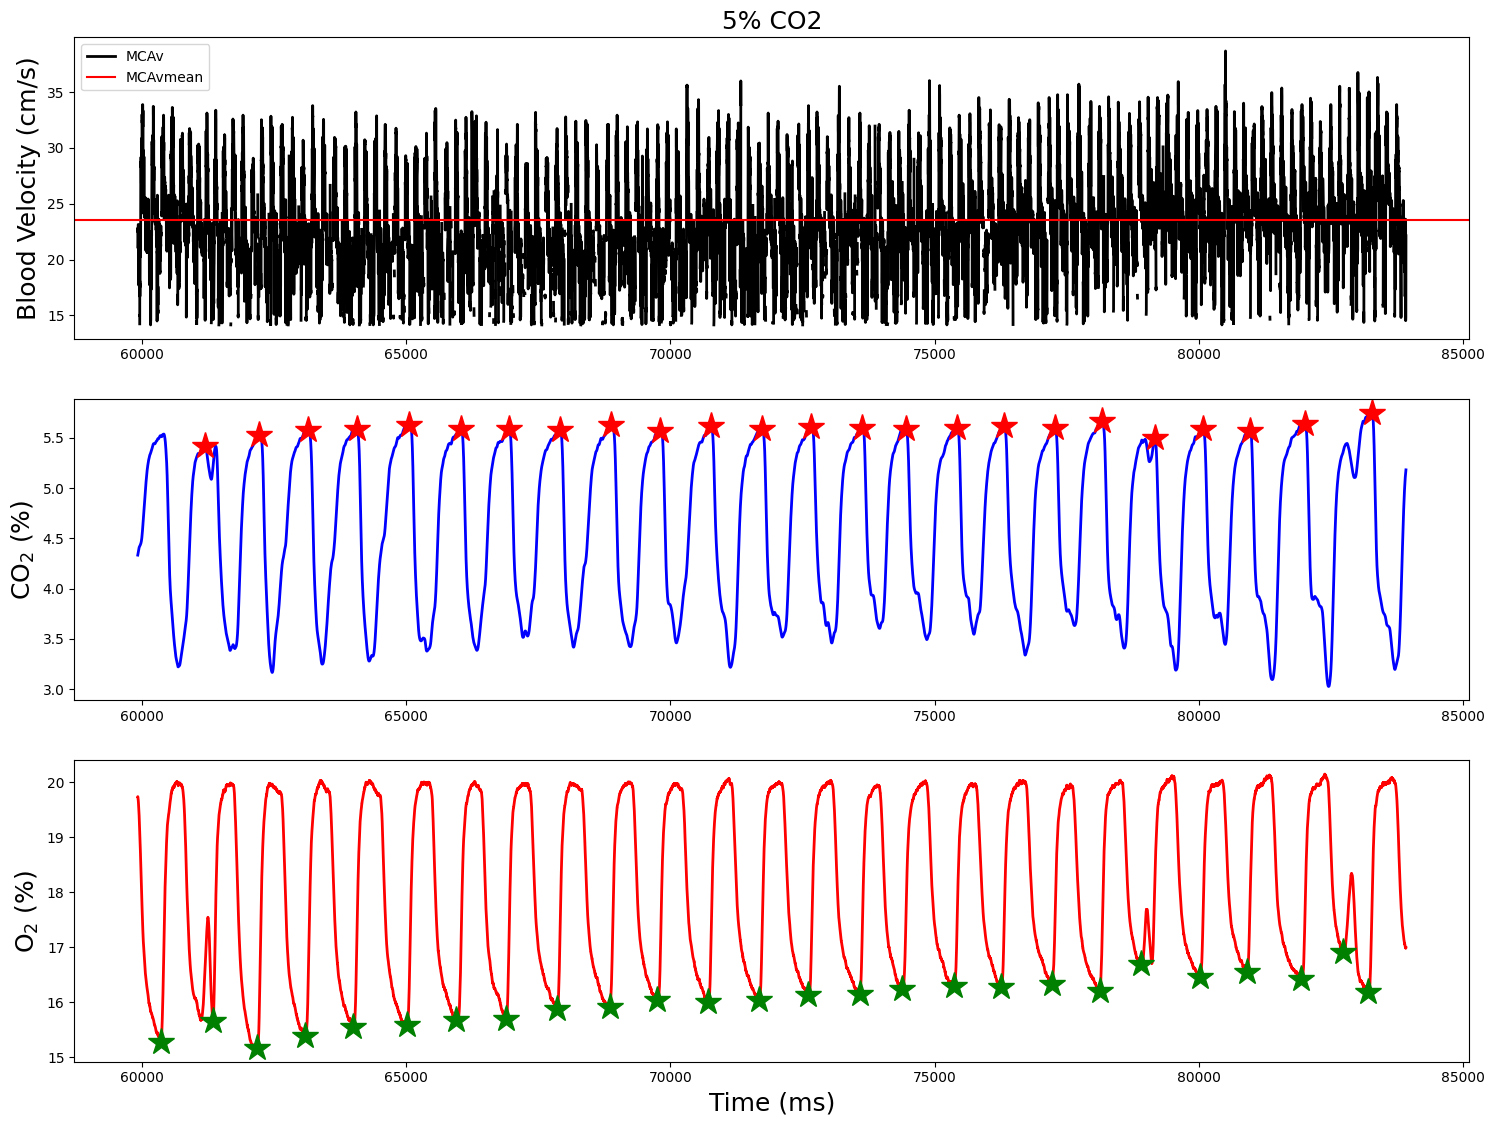

CVR: 0.4166431554902671 %/mmHg
CVR_SI: 7.860633448885261 %/mmHg
Percent CVR: 4.4662281089597275 %/mmHg


In [ ]:
# SUBJECT 2 #

filename = 'sub-002_ses-01_dat-YYYYMMDD_task-tcd5co2_pwl.txt'
filepath = data_dir + filename
CO2prominence_base = 3
O2prominence_base = 3
CO2prominence_5co2 = 1.7
O2prominence_5co2 = 1
comment_start_baseline1 = 0
comment_end_baseline1 = 1
comment_start_5co2 = 2
comment_end_5co2 = 3
comment_start_baseline2 = 4
comment_end_baseline2 = 5

P_oxford = 1023.1 # hPa aka mbar (Oxford)
P_conversion_perc2mmHg = P_oxford*(0.75006157584566)/100 # conversion factor from % gas concentration to mmHg

print(filename)
percent_CVR, CVR, CVR_SI = cvr_func.get_cvr(filepath, plotting, save_fig, save_csv, csv_ses01, save_log, log_ses01, comment_start_baseline1, comment_end_baseline1, comment_start_5co2, comment_end_5co2, comment_start_baseline2, comment_end_baseline2, TCD_calibration_factor, TCD_threshold, CO2prominence_base, O2prominence_base, CO2prominence_5co2, O2prominence_5co2, P_conversion_perc2mmHg, window_length_baseline1, window_length_5co2, window_length_baseline2)
print('CVR: ' + str(CVR) + ' %/mmHg')
print('CVR_SI: ' + str(CVR_SI) + ' %/mmHg')
print('Percent CVR: ' + str(percent_CVR) + ' %/mmHg')

In [ ]:
# Reorder the results and log csv file by subject ID
cvr_func.reorder_csv_by_subj('pwl_outputs/cvr_ses-01.csv')
cvr_func.reorder_csv_by_subj('pwl_outputs/logs_ses-01.csv')

In [ ]:
# Create cvr and log consolidated csv from session csv files
cvr_func.create_consolidated_csv('pwl_outputs/cvr_ses-01.csv', csv_consolidated)
cvr_func.create_consolidated_csv('pwl_outputs/logs_ses-01.csv', log_consolidated)